<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

## Linear SVM

Here we will apply a linear kernal to separate two clusters in 2D. This means our solution hyperplane will be a straight line in the x-y plane.  

We will use the `SVC` (support vector classification) algorithm from the `svm` library.

Scikit-learn has a handy function for generating synthetic data in clusters:

In [47]:
# Create 40 separable points:
X, y = make_blobs(n_samples = 40, centers = 2, random_state = 6)

In [48]:
X.shape, y.shape

((40, 2), (40,))

In [49]:
print(X[:4,0], X[:4,1], y[:4])

[6.37734541 6.50072722 4.29225906 7.39169472] [-10.61510727  -3.82403586  -8.99220442  -3.1266933 ] [1 0 1 0]


X is a 2-column matrix representing 40 (x,y) pairs and y is the cluster membership vector.

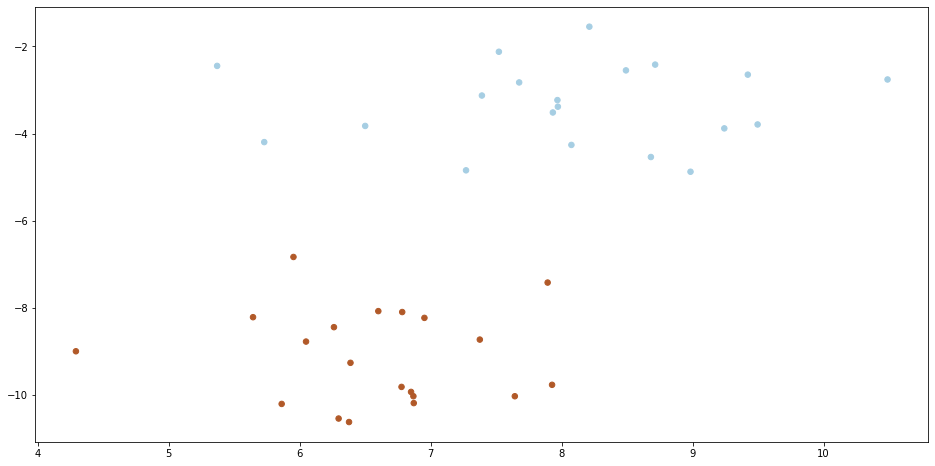

In [50]:
plt.figure(figsize=(16,8))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)  # cmap is the colour map for c
plt.show()

Like many Scikit-learn algorithms, svm.SVC applies regularisation by default. For this demo, we will train the model with regularisation suppressed i.e. make C large, say, = 1000:

In [51]:
# fit the model (linear kernal), without regularisation (make C large):
from sklearn.svm import SVC

# #fit(X, y, sample_weight=None)
# svc = svm.SVC(kernel='linear')
# svc.fit(X, y)
# SVC(kernel='linear')
# fit the model, don't regularize for illustration purposes

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

#or
# clf=svm.SVC(kernel='linear', C=1000).fit(X, y)

SVC(C=1000, kernel='linear')

This will plot the data with the solution hyperplane and dividing boundaries superimposed. Make sure to look up any methods you aren't familiar with and add some comments to explain what they are doing.

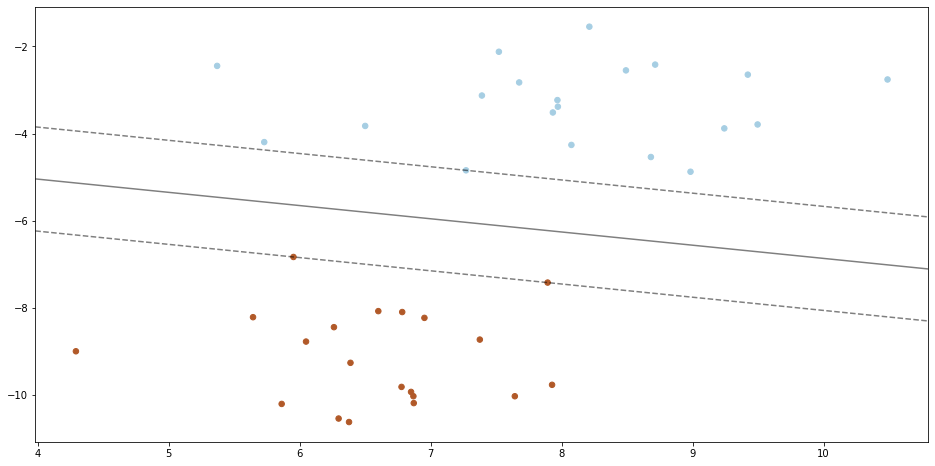

In [52]:
plt.figure(figsize=(16,8))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

# meshgrid creates a rectangular grid out of an array of x values and an array of y values
YY, XX = np.meshgrid(yy, xx)

#numpy.vstack tuple stack arrays in sequence vertically (row wise)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 100, linewidth = 1, facecolors = 'none')
plt.show()

In [53]:
# Find the accuracy score
from sklearn.metrics import accuracy_score

classifier_predictions = clf.predict(X)
print(accuracy_score(y,classifier_predictions)*100)

100.0


In [54]:
# Find the support vectors and the number of support vectors for each class
# get support vectors
clf.support_vectors_

array([[ 7.27059007, -4.84225716],
       [ 5.95313618, -6.82945967],
       [ 7.89359985, -7.41655113]])

In [55]:
# get indices of support vectors
clf.support_ 

array([16, 21, 30])

In [56]:
# get number of support vectors for each class
clf.n_support_ 

array([1, 2])

### Nonlinear SVM

Here we will apply a nonlinear kernel to separate two classes where a linear kernel would fail. For this we will use the `NuSVC` algorithm from the `svm` library.

Generating this dataset relies on a logical trick to classify the points by which quadrant they are in:

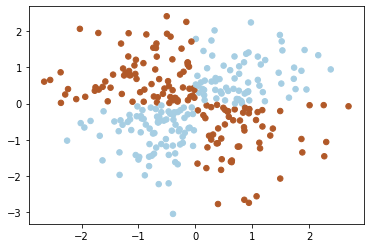

In [57]:
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)

For this demo we will train the model using default parameters, so we instantiate an `svm.NuSVC` with no arguments:

In [58]:
# fit the model using poly
# svclassifier = SVC(kernel='poly', degree=8)
# svclassifier.fit(X, y)

In [59]:
# 2nd fit the model
clf = svm.NuSVC(gamma='auto')
clf.fit(X, y)

NuSVC(gamma='auto')

The next visualisation requires some tricky coding. The `svm.NuSVC` class has a `decision_function` method that we can use to create a heatmap to show how the likelihood of class membership varies over the 2D feature space. The Numpy `meshgrid` function is useful for creating our 2D spatial grid, but the `decision_function` method need the the grid to be passed as a 2D array with x-values in the 1st column and y-values in the second:

<ipython-input-60-830a923b79b7>:23: UserWarning: The following kwargs were not used by contour: 'linetypes'
  contours = plt.contour(xx, yy, Z, levels = [0], linewidths = 2, linetypes = '--')


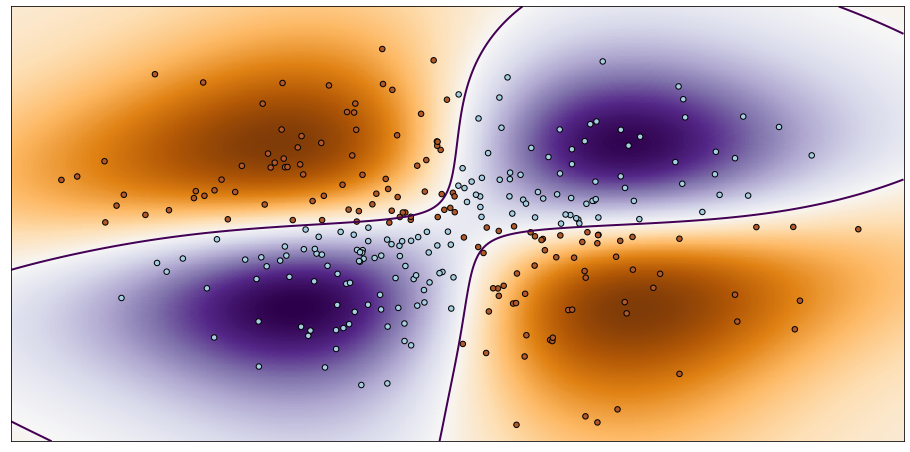

In [60]:
# Plot the decision function for each datapoint on the grid ...
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# create a fine grid on which to calculate the function:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

# use ravel() to transform each array into 1 contiguous vector (row-wise or column-wise);
# then use c_[] to create an array with one column for each or these two vectors;
# then apply the decision_function() to compute the distance of each sample X to the separating hyperplane:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  

# finally, change the shape of the result back into that of the original grid:
Z = Z.reshape(xx.shape)  # put results back into original geometry

# plot Z as a heatmap:
plt.figure(figsize=(16,8))
plt.imshow(Z, interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()), aspect = 'auto',
           origin = 'lower', cmap = plt.cm.PuOr_r)

# plot decision boundaries:
contours = plt.contour(xx, yy, Z, levels = [0], linewidths = 2, linetypes = '--')

# plot original data points:
plt.scatter(X[:, 0], X[:, 1], s = 30, c = y, cmap = plt.cm.Paired, edgecolors = 'k')

# scaling, final rendering:
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

In [61]:
# What kernal is used?
#RBF kernel

In [62]:
# Find the accuracy score
classifier_predictions = clf.predict(X)
print(accuracy_score(y,classifier_predictions)*100)

95.0


In [63]:
# Find the number of support vectors for each class
# get number of support vectors for each class
print("Number of support vectors per class: " + str(clf.n_support_)) 
# get indices of support vectors
print("indices of support vectors: " + str(clf.support_))
# get support vectors
print("Support vectors: " + str(clf.support_vectors_))

Number of support vectors per class: [77 77]
indices of support vectors: [  0   1   5   6   7  15  19  24  28  29  35  46  47  48  49  61  62  71
  72  77  81  84  91  96 100 103 113 114 121 122 131 133 136 142 148 151
 158 159 162 172 174 178 180 183 187 191 194 203 204 206 208 216 218 219
 224 226 227 228 235 236 249 259 260 266 268 269 272 275 283 284 286 290
 294 296 297 298 299   3   4   8   9  13  17  27  32  34  37  39  43  57
  58  60  66  68  75  89  93  97 104 108 109 111 112 116 125 126 132 134
 135 138 139 140 147 149 152 154 155 157 161 163 173 182 185 186 189 192
 195 211 212 213 214 217 221 222 229 231 232 234 244 247 250 251 257 262
 270 271 276 278 280 281 282 287 289 293]
Support vectors: [[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 0.14404357  1.45427351]
 [ 0.76103773  0.12167502]
 [ 0.44386323  0.33367433]
 [ 0.15494743  0.37816252]
 [-0.38732682 -0.30230275]
 [-1.61389785 -0.21274028]
 [ 0.06651722  0.3024719 ]
 [-0.63432209 -0.36274117]
 [ 0.72909056 

In [64]:
# BONUS: Repeat the exerise but with an maximum of 10% margin (misclassification) errors i.e. a harder margin

# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC

# fit the model, change nu to 0.1 to represent 10% margin
clf = svm.NuSVC(nu = 0.1, gamma='auto')
clf.fit(X, y)

NuSVC(gamma='auto', nu=0.1)

<ipython-input-42-830a923b79b7>:23: UserWarning: The following kwargs were not used by contour: 'linetypes'
  contours = plt.contour(xx, yy, Z, levels = [0], linewidths = 2, linetypes = '--')


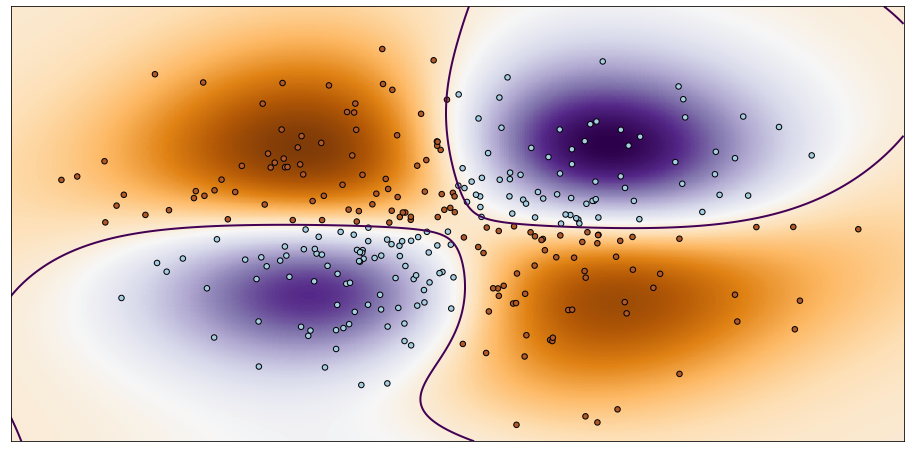

In [42]:
# Plot the decision function for each datapoint on the grid ...
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# create a fine grid on which to calculate the function:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

# use ravel() to transform each array into 1 contiguous vector (row-wise or column-wise);
# then use c_[] to create an array with one column for each or these two vectors;
# then apply the decision_function() to compute the distance of each sample X to the separating hyperplane:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  

# finally, change the shape of the result back into that of the original grid:
Z = Z.reshape(xx.shape)  # put results back into original geometry

# plot Z as a heatmap:
plt.figure(figsize=(16,8))
plt.imshow(Z, interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()), aspect = 'auto',
           origin = 'lower', cmap = plt.cm.PuOr_r)

# plot decision boundaries:
contours = plt.contour(xx, yy, Z, levels = [0], linewidths = 2, linetypes = '--')

# plot original data points:
plt.scatter(X[:, 0], X[:, 1], s = 30, c = y, cmap = plt.cm.Paired, edgecolors = 'k')

# scaling, final rendering:
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

In [43]:
# Find the accuracy score
classifier_predictions = clf.predict(X)
print(accuracy_score(y,classifier_predictions)*100)

99.0


In [45]:
# Find the number of support vectors for each class
# get number of support vectors for each class
print("Number of support vectors per class: " + str(clf.n_support_)) 
# get indices of support vectors
print("indices of support vectors: " + str(clf.support_))
# get support vectors location
print("Support vectors on x/y axis: " + str(clf.support_vectors_))

Number of support vectors per class: [18 22]
indices of support vectors: [ 28  48  49 103 113 121 131 158 159 180 187 218 249 268 269 275 284 294
  13  27  39  66  75  89  93 104 108 126 140 163 182 192 212 221 222 229
 244 250 278 280]
Support vectors on x/y axis: [[ 0.06651722  0.3024719 ]
 [ 0.01050002  1.78587049]
 [ 0.12691209  0.40198936]
 [-0.02432612 -0.73803091]
 [ 0.15650654  0.23218104]
 [-0.13288058 -0.29779088]
 [-0.59631404 -0.0525673 ]
 [-0.04217145 -0.28688719]
 [-0.0616264  -0.10730528]
 [ 0.69845715  0.00377089]
 [ 0.04949498  0.49383678]
 [ 0.82158571  0.00529265]
 [-1.01804188 -0.07785476]
 [-0.26164545 -0.18224478]
 [-0.20289684 -0.10988278]
 [ 0.16392857  0.09632136]
 [ 0.0086279   0.52700421]
 [-0.392389   -3.04614305]
 [ 0.04575852 -0.18718385]
 [-0.02818223  0.42833187]
 [-0.31155253  0.05616534]
 [-0.67433266  0.03183056]
 [-0.06824161  1.71334272]
 [-0.4555325   0.01747916]
 [-1.10438334  0.05216508]
 [ 0.2799246  -0.09815039]
 [-0.01702041  0.37915174]
 [ 0.

## === End ===



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



